## Instructions
- See deadline on the course web page
- See examination rules on the course web page.
- This problem set is performed individually (collaboration is encouraged, but each individual must be able to explain all of his/her hand-in solutions).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [1]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Brou Boni'  # string
student['Firstname']='Joel' # string
student['CID']='joelaho'        # string
student['DOB-year']=1999         # four-digit integer
student['DOB-month']=5           # integer in the range [1, 12]
student['DOB-day']=11            # integer in the range [1, 31]

# 
# YOUR CODE HERE
# 

In [2]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 2
## Extra problems
### Learning from data [TIF285], Chalmers, Fall 2020

Last revised: 16-Sep-2020 by Christian Forssén [christian.forssen@chalmers.se]

In [3]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 5 (extra): MCMC sampling part 2: multi-dimensional distributions, acceptance ratios and auto-correlation
### (3 points)
*You should have solved problems 3 and 4 before doing this problem.*

In [4]:
# importing modules

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import multivariate_normal
#...

# 
# YOUR CODE HERE
# 

A challenge when doing MCMC sampling is that the collected samples can be *correlated*. This can be tested by computing the *autocorrelation function* and extracting the correlation time.

Say that $X$ is an array of $N$ samples numbered by the index $t$. Then $X_{+h}$ is a shifted version of $X$ with elements $X_{t+h}$. The integer $h$ is called the *lag*. Since we have a finite number of samples, the array $X_{+h}$ will be $h$ elements shorter than $X$. 

Furthermore, $\bar{X}$ is the average value of $X$.

We can then define the autocorrelation function $\rho(h)$ from the list of samples. 
$$
\rho(h) = \frac{\sum_{t=0}^{N-h-1} \left[ (X_t - \bar{X}) (X_{t+h} - \bar{X})\right]}
{\sqrt{ \sum_{t=0}^{N} (X_t - \bar{X})^2 } \sqrt{ \sum_{t=0}^{N-h-1} (X_{t+h} - \bar{X})^2 }}
$$
The summation is carried out over the subset of samples that overlap.

* It is often observed that $\rho(h)$ is roughly exponential so that we can define an autocorrelation time $\tau$ according to
$$
\rho(h) \sim \exp(-h/\tau).
$$
* Try to understand what the autocorrelation time measures and why it is large (small) when the samples are correlated (not correlated)\*.

\* *The autocorrelation is the overlap (scalar product) of the chain of samples (the trace) with a copy of itself shifted by the lag, as a function of the lag. If the lag is short so that nearby samples are close to each other (and have not moved very far) the product of these two vectors is large. If samples are independent, you will have both positive and negative numbers in the overlap that cancel each other.*

#### Tasks
- Repeat the MCMC sampling of a Lorentzian pdf using the random walk Metropolis algorithm from Problem 3. However, we will make the sampler numerically more stable by working with the logarithm of the probability densities rather than with the densities.
- Create a two-dimensional sampler for which the posterior function takes two arguments so that you can apply it to the signal amplitude plus background model from Problem 4. The proposal distribution will now be a two-dimensional Gaussian. We will use the simplest possible multivariate Gaussian with a single width parameter (see `scipy.stats.multivariate_normal`). Also this sampler should work with log probability densities.
- Re-analyze the baseline case. Rather than scanning the two-dimensional parameter space, as we did in Problem 4, you can now collect samples from the posterior pdf.

Extract both the autocorrelation time $\tau$ and the acceptance ratio $r$ for some different choices of the proposal width; e.g. 0.1, 0.5, 1.0, 2.0. What is a good choice for sampling these distributions?

In [7]:
def log_posterior_func(x,normalized=False):
    '''
    Return the posterior pdf given by a standard Cauchy (Lorentzian).
    
    Args:
        x: position in a one-dimensional space
        normalized: Return a normalized pdf if True (optional, default=False)
    '''
    # YOUR CODE HERE
    post=np.log(1/(1+x**2))
    if normalized==True:
        post=np.log(1/np.pi*(1/(1+x**2)))
    return post    
                             


In [9]:
# Sampler algorithms
# - 1d sampler from Problem 3 (without plotting). But using the log pdf.
# - 2d sampler (without plotting) again using the log pdf.


def sampler_1d(log_posterior_func, no_of_samples=4, start_position=.5, 
            proposal_width=1.):
    '''
    Metropolis sampler function for a one-dimensional pdf.
    
    Args:
        log_posterior_func: Function that takes a single positional argument and returns 
            the logarithm of the (possibly unnormalized) pdf value.
        no_of_samples: (integer) Number of samples that will be returned (excluding the start position). 
            (default=4)
        start_position: (float) Start position. (default=0.5)
        proposal_width: (float) Width of Gaussian proposal distribution. (default=1.)
        
    Returns:
        samples: Array of floats. Length = no_of_samples+1
    '''
    # 
    # YOUR CODE HERE
    # 
    current_position = start_position
    samples = [current_position]
    trace= [current_position]


    for i in range(no_of_samples-1):  # num_steps-1 so k_array[i+1] is always defined
        # 2. Propose a step
        proposed_position=norm(current_position,proposal_width).rvs()
         # 3. Calculate Metropolis ratio
        p_current = log_posterior_func(current_position)
        p_proposal = log_posterior_func(proposed_position)
        p_accept=p_proposal / p_current
        rand=np.random.rand()
        accept=rand < p_accept
        
                
        #trace.append(current_position)
                
        # Visualization
        if plot:
            assert no_of_samples < 11, "Too many samples for visualization"
            plot_proposal(posterior_func, current_position, p_current, 
                          proposed_position, p_proposal, accept, samples, i)
        
        # Possibly update position
        # 3 columns,1 normalized,2 proposed positions,(trace+posterior)
        # YOUR CODE HERE
        # 
        if rand < accept:
             current_position = proposed_position # step to the right
             
        else:
                trace.append(current_position)
            
        samples.append(current_position)
    
    return np.array(samples)
    

def sampler_2d(log_posterior_func, no_of_samples=4, start_position=[.5,.5], 
            proposal_width=1.):
    '''
    Metropolis sampler function for a two-dimensional pdf.
    
    Args:
        log_posterior_func: Function that takes two positional arguments and returns 
            the logarithm of the (possibly unnormalized) pdf value.
        no_of_samples: (integer) Number of samples that will be returned (excluding the start position). 
            (default=4)
        start_position: (list or array of floats) Start position. (default=[0.5,0.5])
        proposal_width: (float) Width of symmetric Gaussian proposal distribution. (default=1.)
        
    Returns:
        samples: Array of floats. samples.shape = (no_of_samples+1,2)
    '''
    # 
    # YOUR CODE HERE
    # 
    current_position = [start_position,start_position]
    samples = [current_position,current_position]
    


    for i in range(no_of_samples-1):  # num_steps-1 so k_array[i+1] is always defined
        # 2. Propose a step
        proposed_position=multivariate_normal.pdf(0,mean=0,cov=proposal_width)
         # 3. Calculate Metropolis ratio
        p_current = np.array[log_posterior_func(current_position[0]),log_posterior_func(current_position[1])]
        p_proposal = np.array[log_posterior_func(proposed_position[0]),log_posterior_func(proposed_position[1])]
        p_accept=p_proposal / p_current
        rand=np.random.rand()
        accept1=rand < p_accept[0]
        accept2=rand < p_accept[1]
        
        # Visualization
        if plot:
            assert no_of_samples < 11, "Too many samples for visualization"
            plot_proposal(posterior_func, current_position, p_current, 
                          proposed_position, p_proposal, accept, samples, i)
        
        # Possibly update position
        # 3 columns,1 normalized,2 proposed positions,(trace+posterior)
        # YOUR CODE HERE
        # 
        if rand < accept1:
             current_position[0] = proposed_position[0] # step to the right
        if rand < accept2:
             current_position[1] = proposed_position[1] # step to the right
            
        samples.append(current_position[0],current_position[0])
    
    return np.array(samples)

In [10]:
sampler_2d(log_posterior_func, no_of_samples=4, start_position=[.5,.5], 
            proposal_width=1.)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [ ]:
# Copy the posterior function from Problem 3 

# One-dimensional problem
#
def log_posterior_function_1d(x, normalized=False):
    '''
    Return the posterior pdf given by a standard Cauchy (Lorentzian).
    
    Args:
        x: position in a one-dimensional space
        normalized: Return a normalized pdf if True (optional, default=False)
    '''
    # 
    # YOUR CODE HERE
    # 
    post=np.log(1/(1+x**2))
    if normalized==True:
        post=np.log(1/math.pi*(1+x**2))  
    return post  

In [11]:
# Copy the log-posterior function from Problem 4.
# Two-dimensional problem

# The measured "Baseline" data has been generated already and will be loaded from a pickle file.
# It is a dictionary with four keys corresponding to the four cases, and each value
# corresponding to xk_pts, Dk_pts, Nk_pts, x_max, n_0
with open(f'{DATA_DIR}/data_signal_and_background.pickle','rb') as f:
    data = pickle.load(f)
    cases = data.keys()

# Data for baseline case: 15 bins and maximum expection of 100 counts.
xk_pts_baseline, Dk_pts_baseline, Nk_pts_baseline, x_max_baseline, n_0_baseline = \
    data['Baseline']

# Define the pdfs and combine with Bayes' theorem.

def log_prior(A, B):
    """
    Log prior .
    
    We take a uniform (flat) prior with large enough
    maximums but, more importantly, require positive values for A and B.
    """
    A_max = 5.
    B_max = 5.
    # flat prior 
    if np.logical_and(A <= A_max, B <= B_max).all(): 
        return np.log(1/(A_max * B_max))
    else:
        return -np.inf

def log_likelihood(A, B, xk_pts, Nk_pts, n_0):
    """Log likelihood for data Nk_pts given A and B"""
    # 
    # YOUR CODE HERE
    # 
    multi=1
    sum_0 = 0;sum_1 = 0;sum_2 = 0;
    
    for i in range (len(xk_pts)):
        D = n_0 *(A*np.exp((-xk_pts[i]**2)/(10))+B) 
        sum_0 = sum_0+D
        sum_1 = sum_1 + np.log(Nk_pts[i])
        sum_2 = sum_2+(Nk_pts[i]*np.log(D))
    likli = - sum_0 - sum_1 + sum_2
    
    return likli

    
def log_posterior(A, B, xk_pts, Nk_pts, n_0):
    """Log posterior for data Nk_pts given A and B"""
    return log_prior(A, B) + log_likelihood(A, B, xk_pts, Nk_pts, n_0)

# 

def log_posterior_2d(theta):
    '''
    This function returns the log posterior for the specific baseline data set loaded above.
    
    It represents the posterior pdf that we will sample from.
    
    Args:
        theta: parameter vector (array or list of floats) of length 2.
    '''
    return log_posterior(theta[0], theta[1], xk_pts_baseline, Nk_pts_baseline, n_0_baseline)

FileNotFoundError: [Errno 2] No such file or directory: 'DataFiles//data_signal_and_background.pickle'

In [17]:
def acceptance_ratio(chain):
    '''
    Returns the acceptance ratio for a MCMC chain
    
    Args:
        chain: 1d- or 2d-array with MCMC samples. The length of axis-0 
            corresponds to the number of samples and the length of axis-1
            to the number of parameters
            
    Returns:
        r: Acceptance ratio (float). Note that 0 <= r <= 1.0
            We define r = number of accepted proposed steps / # proposed steps
            where we note that the # propsed steps = # samples - 1
    '''
    
    # 
    # YOUR CODE HERE
    # 

In [ ]:
# In this one-dimensional chain we have accepted two proposed steps out of four (the first one is the starting point)
chain_1d = np.array([0., 0., 1., 2., 2.])
assert np.abs( acceptance_ratio(chain_1d) - 2/( len(chain_1d)-1 )) < 0.0001
# In this two-dimensional chain we have accepted two proposed steps out of three (the first one is the starting point)
chain_2d = np.array([[0., 0.], [1., 2.], [1., 2.], [2., 2.]])
assert np.abs( acceptance_ratio(chain_2d) - 2/( len(chain_2d)-1 )) < 0.0001

In [ ]:
def autocorrelation(chain, max_lag):
    """
    Autocorrelation function rho(h) for a MCMC chain.
    
    Args:
        chain: 1d- or 2d-array with MCMC samples. The length of axis-0 
            corresponds to the number of samples, n_samples, and the length of axis-1
            to the number of parameters, ndim.
        max_lag: The maximum lag, h. (integer)
        
    Returns:
        acors: ndarray containing the autocorrelations rho(h) for each
                dimension of the chain separately.

    The shape of the returned array is
        -> (max_lag+1, ndim) if the shape of chain is (n_samples, ndim)
        -> (max_lag+1,) if the shape of the chain is (n_samples,).
    """
    # 
    # YOUR CODE HERE
    # 

In [ ]:
np.random.seed(1)
# Create a correlated one-dimensional chain of samples.
chain = np.exp(-np.arange(100)/10)
max_lag=10
acor = autocorrelation(chain, max_lag)
# Zero lag => max correlation
assert acor[0]==1.
assert np.abs( acor[-1]-0.75719323 ) < 0.001

Use four different proposal widths (as indicated below) and extract the acceptance ratio and the correlation time(s) for the one- and two-dimensional MCMC samplers. Use 10,000 samples for each sampling.

In [ ]:
print('One-dimensional MCMC sampling\n')
print('width   acc. ratio   tau')
no_of_samples=10000

for width in [0.1, 0.5, 1.0, 2.0]:
    # 
    # YOUR CODE HERE
    # 

In [ ]:
print('Two-dimensional MCMC sampling\n')
print('width   acc. ratio   tau[A]   tau[B]')
no_of_samples=10000

for width in [0.01, 0.05, 0.1, 0.5]:
    # 
    # YOUR CODE HERE
    # 
    
    print(f' {width:.2f}   {acc_ratio:.2f}           {tau[0]:4d}     {tau[1]:4d}')


## Problem 6: Good-data, bad-data
### Task (a): 3 points; Task (b): 1 point

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy.stats import norm

import seaborn; seaborn.set("talk") # for plot formatting
import warnings

Let's start by defining some data that we will fit with a straight line.  The following data is measured velocities and distances for a set of galaxies. We will assume that there is a constant standard deviation of $\sigma = 200$ km/sec on the $y$ values and no error on $x$.

In [27]:
# Data from student lab observations; 
# x = Galaxy distances in MPc
# y = Galaxy velocity in km/sec
x = np.array([10.1 ,45.2, 19.7, 31.2, 31.9, 44.0,
       14.9, 35.1,  39.9  ])
y = np.array([1507.9, 2937.5,  930.4, 2037.1, 2131.1,
       2795.6, 1061.8, 2464.8, 
       1971.1])
# Two of these samples, the 10.1 and 39.9 data points, were added by hand.
# They are rather extreme samples from a Cauchy distribution with the same FWHM and 
# could be assumed to come from an experiment where the statistical error model is incorrect
# (Gaussian instead of Lorenzian).

intercept = 0.
slope = 70
theta_true = [intercept, slope]

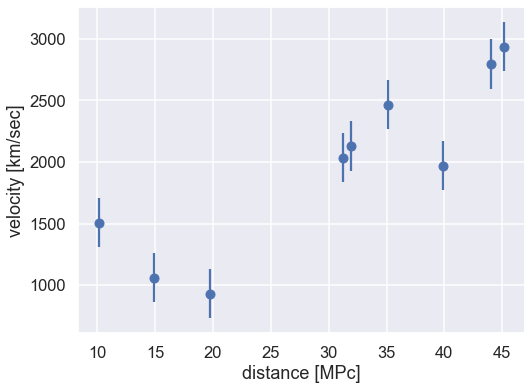

In [28]:
# Plot the data with the assumed error model indicated by a standard deviation
dy=200
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x, y, dy, fmt='o')
ax.set_xlabel(r'distance [MPc]')
ax.set_ylabel(r'velocity [km/sec]');

### Task (a)

The question that we will be asking is: 
> What value would you infer for the Hubble constant, i.e. the slope of the velocity versus distance relation, given this data?

We will make the prior assumption that the data can be fitted with a straight line. But we note that we are actually not interested in the offset of the straight line, but just its slope.

We will try three different approaches:
1. Maximum likelihood estimate
1. Bayesian analysis
1. Bayesian analysis incorporating a fully Bayesian approach to good-data-bad-data

As a second task, we will also explore how the posterior belief from this analysis can feed into a subsequent data analysis.

#### Statistical model
Here we are given data with simple error bars (constant $\sigma$), which implies that the probability for any *single* data point is a normal distribution about the true value. That is,

$$
y_i \sim \mathcal{N}(y_M(x_i;\theta), \sigma),
$$

with $y_M(x) = mx + b$.
Or, in other words,

$$
p(x_i,y_i\mid\theta) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(\frac{-\left[y_i - y_M(x_i;\theta)\right]^2}{2\sigma^2}\right)
$$

where $\sigma$ is the (known) measurement error indicated by the error bars.

#### Step 1: Maximum likelihood estimate

Perform a maximum likelihood estimate of the slope and the intercept. 
- Use `optimize.minimize` from `scipy` to find the maximum of the log likelihood.
- Estimate an uncertainty by extracting the inverse of the Hessian (second derivative of the log likelihood) at the optimum. Note that the result from `optimize.minimize` will have a property `hess_inv`. 

In [90]:
def log_likelihood(theta):
    '''
    
    Returns the log likelihood.
    
    Args:
        theta: array of floats with two elements. theta[0]=intercept. theta[1]=slope
        x: data (independent variable). array of floats
        y: data (dependent variable). array of floats
        dy: fixed error (optional), standard deviation of a normal distribution
        
    Returns:
        logL: log likelihood
    '''
    m = theta[0]
    b = theta[1]
    dy=200 
    return (-0.5 * np.sum(np.log(2 * np.pi * dy ** 2) + (y - (theta[0]+theta[1]*x)) * 2 / dy ** 2))

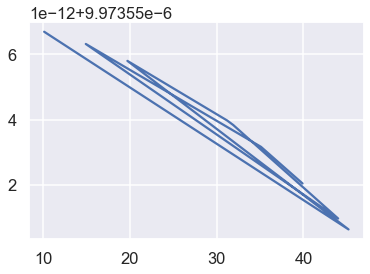

In [89]:
lik_model = optimize.minimize(log_likelihood, x]))
#lik_model.x
#plt.scatter(x,y)
plt.plot(x,norm.pdf(x,0))
plt.show()

In [30]:
# Maximum likelihood estimate (MLE)
# The parameter vector theta = [intercept, slope]
# Assign the two arrays with the MLE estimate and the diagonal elements of the inverse hessian
theta_MLE = np.array([0.,0.])
err_theta_MLE = np.array([0.,0.])
optimize.minimize(mle(theta,theta_MLE),theta_MLE)



NameError: name 'theta' is not defined

In [ ]:
assert not (theta_MLE==0).all(), 'The theta_MLE array should contain the MLE estimate'
assert not (err_theta_MLE==0).all(), 'The err_theta_MLE array should contain the MLE error estimate'


#### Step 2: Bayesian analysis
For the Bayesian analysis we would recommend a Gaussian prior (mean=0, standard deviation=$\sigma = 200$ km/sec) for the intercept, and a symmetric prior
$$
p(m|I) \propto \frac{1}{(1+m^2)^{3/2}}
$$
for the slope (the latter was used also in the fitting straight line example).

- Check the trace of the MCMC sampling to make sure (visually) that you use a proper warmup period. 
- Plot the samples using the `corner` package and extract the median and 68% credibility region for the slope parameter using the marginalized distribution.
- Use the parameter samples to create corresponding samples of our model predictions. Show the model prediction together with the data by plotting (i) the prediction using the median, point estimate for the parameters as well as (ii) a filled band corresponding to the  68% credibility region of these sampled predictions.

In [ ]:
# Define the log prior and the log posterior
#
# 
# YOUR CODE HERE
# 

In [ ]:
# Perform MCMC sampling
#
# 
# YOUR CODE HERE
# 

In [ ]:
# Our choice of starting points were not optimal. It takes some time for the MCMC chains 
# to converge. We recommend to study the traces.
#
# 
# YOUR CODE HERE
# 

In [ ]:
# And choose an appropriate warm-up time
nwarmup = 0 # update this!

# we'll throw-out the warmup points, collect the chains from all walkers, 
# and reshape into an array 'samples' of shape (nsamples, 2)
samples=np.array([])

# 
# YOUR CODE HERE
# 

In [ ]:
# Plot the samples using the `corner` package and extract the median and 
# 68% confidence region for the slope parameter
# 
# YOUR CODE HERE
# 

In [ ]:
# We can use the parameter samples to create corrsponding samples of our model predictions. 
# Plot the prediction using the median, point estimate for the parameters 
# as well as a filled band corresponding to the  68% credibility region of these sampled predictions.

# 
# YOUR CODE HERE
# 

#### Step 3: Bayesian Approach to Outliers (good-data/bad-data)

There are several Bayesian approaches to accounting for outliers. They generally involve *modifying the statistical model*. For this data, it is abundantly clear that a simple straight line is not a good fit to our data. So let's propose a more complicated model that has the flexibility to account for outliers where the experimental error bar might have been underestimated. 

Specifically we will assume that there is a chance that the error distribution is represented by a Lorentzian distribution rather than a Gaussian. The peaks of these two distributions are very similar in shape, but the Lorentzian has much heavier tails.

We will use a statistical model in which we allow each individual data point $(x_i,y_i)$ to be described by
a mixture between a Gaussian and a Lorentzian error model: 

$$
\begin{array}{ll}
p(\{x_i\}, \{y_i\}~|~\theta,\{g_i\},\sigma) = & g_i \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left[\frac{-\left(y_M(x_i~|~\theta) - y_i\right)^2}{2\sigma^2}\right] \\
&+ (1 - g_i) \frac{1}{\sqrt{2}\pi \sigma} \frac{1}{1 + \left[ y_M (x_i~|~\theta) - y_i\right]^2 / (2\sigma^2)}
\end{array}
$$

What we've done is expanded our model with some nuisance parameters, $\{g_i\}$, that is a series of weights which range from 0 to 1 and encode for each point $i$ the degree to which it fits the different error models. 

Our model is much more complicated now: it has one new parameter per data point, but these can be considered nuisance parameters that can be marginalized-out in the end.  You can use a uniform prior $U(0,1)$ for these parameters. For the theoretical model we would recommend a Gaussian prior (mean=0, standard deviation $= \sigma = 200$ km/sec) for the intercept, and a symmetric prior. 

- Your task is to implement this likelihood and to use, e.g., the [emcee](http://dan.iel.fm/emcee/current/) MCMC package to explore the parameter space.
- Display the joint posterior for the slope and the intercept using a corner plot (i.e. marginalize over the g-parameters). 
- Extract the median and 68% credibility region for the slope parameter using the marginalized distribution.
- Finally, study the posterior distribution for the g-parameters. Can you conclude which data points are more likely to be outliers (i.e. underestimated tails of the error distribution)?

In [ ]:
# Implement the log prior, likelihood, posterior
#

# 
# YOUR CODE HERE
# 

In [ ]:
# Perform the MCMC sampling
#
# Note that this step can be computationally costly. For the submitted version you are encouraged 
# to use less than 10,000 samples for each walker (and no more than 50 walkers)

# 
# YOUR CODE HERE
# 

In [ ]:
# Corner plot for the intercept and slope parameters
#

# 
# YOUR CODE HERE
# 

In [ ]:
# Plot the posterior joint pdf for the g-parameters (using a corner plot)
#
# 
# YOUR CODE HERE
# 

In [ ]:
# Which data points are most likely outliers?
#
# 
# YOUR CODE HERE
# 

### Task (b): Error propagation

The Bayesian approach offers a straight-forward approach for dealing with (known) systematic uncertainties; namely by marginalization.

The Hubble constant acts as a galactic ruler as it is used to measure astronomical distances according to $v = H_0 x$. An error in this ruler will therefore correspond to a systematic uncertainty in such measurements.

Suppose that a particular galaxy has a measured recessional velocity $v_\mathrm{measured} = (100 \pm 5) \times 10^3$ km/sec. Also assume that the Hubble constant $H_0$ is known from the analysis performed above in Step 3. Determine the posterior pdf for the distance to the galaxy assuming:
1. A fixed value of $H_0$ corresponding to the posterior mean of the previous analysis.
1. Using the full, sampled posterior pdf for $H_0$ from the same analysis.

In this analysis we will set the intercept $m=0$ so that $v_\mathrm{theory} = H_0 x$.

In [ ]:
vm=100000
sig_vm=5000

We assume that we can write
$$
v_\mathrm{measured} = v_\mathrm{theory} + \delta v_\mathrm{exp},
$$
where $v_\mathrm{theory}$ is the recessional velocity according to our model, and $\delta v_\mathrm{exp}$ represents the noise component of the measurement. We that $\delta v_\mathrm{exp}$ can be described by a Gaussian pdf with mean 0 and standard deviation $\sigma_v = 5 \times 10^3$ km/sec. Note that we have also assumed that our model is perfect, i.e. $\delta v_\mathrm{theory}$ is negligible.

In the following, we also assume that the error in the measurement in $v$ is uncorrelated with the uncertainty in $H_0$.

Through application of Bayes' rule we can readily evaluate the posterior pdf $p(x|D,I)$ for the distance $x$ to the galaxy.

#### Case 1: Fixed $H_0$

\begin{align}
p(x | D,I) & \propto p(D | x, I) p(x|I) \\
& = \frac{1}{\sqrt{2\pi}\sigma_v} \exp \left( - \frac{(v_\mathrm{measured} - v_\mathrm{theory})^2}{2\sigma_v^2} \right) p(x|I)\\
&= \left\{ \begin{array}{ll} \frac{1}{\sqrt{2\pi}\sigma_v} \exp \left( - \frac{(v_\mathrm{measured} - H_0 x)^2}{2\sigma_v^2} \right) & \text{with }x \in [x_\mathrm{min},x_\mathrm{max}] \\
0 & \text{otherwise},
\end{array} \right.
\end{align}


where $p(x|I)$ is the prior for the distance which we have assumed to be uniform, i.e. $p(x|I) \propto 1$ in some (possibly large) region $[x_\mathrm{min},x_\mathrm{max}]$.

In [ ]:
# Find the median value for H
#
# 
# YOUR CODE HERE
# 

#### Case 2: Using the inferred pdf for $H_0$

Here we use marginalization to obtain the desired posterior pdf $p(x|D,I)$ from the joint distribution of $p(x,H_0|D,I)$
$$
p(x|D,I) = \int_{-\infty}^\infty dH_0 p(x,H_0|D,I).
$$

Using Bayes' rule, the product rule, and the fact that $H_0$ is independent of $x$ we find that
$$
p(x|D,I) \propto p(x|I) \int dH_0 p(H_0|I) p(D|x,H_0,I),
$$
which means that we have expressed the quantity that we want (the posterior for $x$) in terms of quantities that we know.

The pdf $p(H_0 | I)$ is known via its $N$ samples $\{H_{i}\}$ generated by the MCMC sampler.

This means that we can approximate 
$$
p(x |D,I) = \int dH_0 p(H_0|I) p(D|x,H_0,I) \approx \frac{1}{N} \sum_{i=1}^N p(D | x, H_i, I)
$$
where we have used $p(x|I) \propto 1$.

In [ ]:
# Infer the distance using the two different approaches (point estimate for H_0, and using the full pdf for H_0)
#
# 
# YOUR CODE HERE
# 